<a href="https://colab.research.google.com/github/pix2712/10-Vietnamese-Food/blob/main/10_food_VN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf 
import numpy as np
import os


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
train = ImageDataGenerator(rescale = 1./255,
                           width_shift_range=0.2,
                           rotation_range=40,
                           shear_range=0.2,
                           height_shift_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True)
validation = ImageDataGenerator(rescale=1/255)


In [6]:
train_dataset = train.flow_from_directory('/content/gdrive/MyDrive/Exam/10 VN Food/Train',target_size=(150,150),batch_size=3,class_mode='categorical')
validation_dataset = train.flow_from_directory('/content/gdrive/MyDrive/Exam/10 VN Food/Validation',target_size=(150,150),batch_size=3,class_mode='categorical')

Found 132 images belonging to 10 classes.
Found 40 images belonging to 10 classes.


In [7]:
train_dataset.class_indices

{'Bánh bao': 0,
 'Bánh cuốn': 1,
 'Bánh xèo': 2,
 'Cá kho': 3,
 'Cá viên': 4,
 'Chả giò': 5,
 'Rau muống xào': 6,
 'Thịt': 7,
 'Xúc xích': 8,
 'Đậu hũ': 9}

In [34]:
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential, load_model
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer= 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_dataset,epochs=50,batch_size=128,validation_data=validation_dataset,verbose=1)

Epoch 1/50
44/44 [==============================] - 3s 43ms/step - loss: 2.3727 - accuracy: 0.1136 - val_loss: 2.1406 - val_accuracy: 0.1250
Epoch 2/50
44/44 [==============================] - 2s 37ms/step - loss: 2.2386 - accuracy: 0.1742 - val_loss: 2.2735 - val_accuracy: 0.2250
Epoch 3/50
44/44 [==============================] - 2s 37ms/step - loss: 2.1850 - accuracy: 0.1667 - val_loss: 2.1928 - val_accuracy: 0.1500
Epoch 4/50
44/44 [==============================] - 2s 36ms/step - loss: 2.0837 - accuracy: 0.2121 - val_loss: 2.0577 - val_accuracy: 0.2250
Epoch 5/50
44/44 [==============================] - 2s 37ms/step - loss: 2.0627 - accuracy: 0.2576 - val_loss: 2.1814 - val_accuracy: 0.1750
Epoch 6/50
44/44 [==============================] - 2s 37ms/step - loss: 2.2600 - accuracy: 0.1439 - val_loss: 2.0260 - val_accuracy: 0.2750
Epoch 7/50
44/44 [==============================] - 2s 38ms/step - loss: 2.0571 - accuracy: 0.2348 - val_loss: 1.9888 - val_accuracy: 0.2750
Epoch 8/50
44

In [16]:
score = model.evaluate(validation_dataset,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  0.6047585606575012
độ chính xác kiểm tra là:  0.75


In [31]:
#goi model da train tu truoc do

model5= load_model('/content/final (1).h5') 
print(model5.summary())
score1 = model5.evaluate(validation_dataset,verbose=0)

print('Sai số kiểm tra là: ',score1[0])
print('độ chính xác kiểm tra là: ',score1[1])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 37, 37, 32)        9248      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 18, 18, 32)      

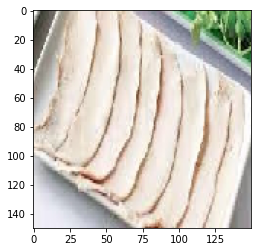

Thit


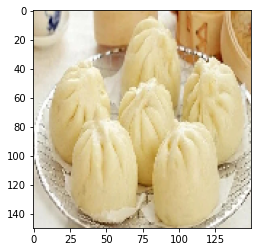

Banh bao


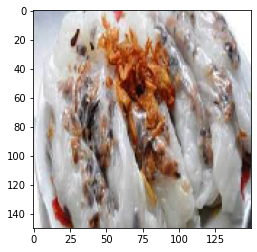

Banh cuon


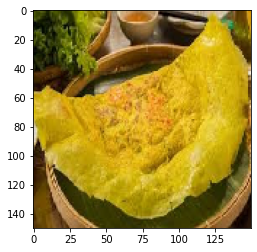

Banh xeo


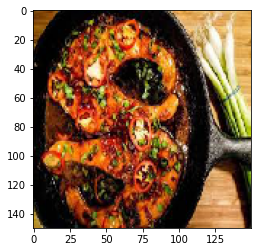

Ca kho


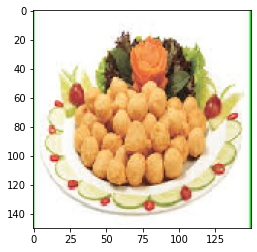

Ca vien


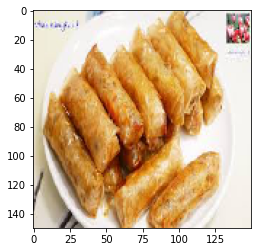

Cha gio


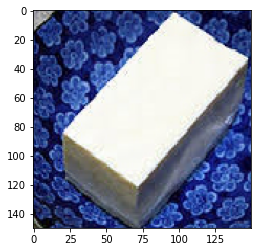

Dau hu


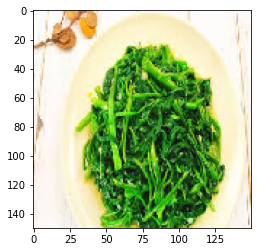

Rau muong xao


(1, 150, 150, 3)

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

path = '/content/gdrive/MyDrive/Exam/10 VN Food/Test'
for i in range (9):
    img = load_img(path+'//'+str(i+1)+'.jpg',target_size=(150,150))
    plt.imshow(img)
    plt.show()

    img = img_to_array(img)
    img=np.reshape(img,(1,150,150,3))
    img = img.astype('float32')
    img = img/255
    predict =  np.argmax(model5.predict(img)) #su dung model da train tu truoc
    if predict==0:
      print("Banh bao")
    elif predict==1: 
      print("Banh cuon")
    elif predict==2: 
      print("Banh xeo")
    elif predict==3: 
      print("Ca kho")
    elif predict==4: 
      print("Ca vien")
    elif predict==5: 
      print("Cha gio")
    elif predict==6: 
      print("Rau muong xao")
    elif predict==7: 
      print("Thit")
    elif predict==8: 
      print("Xuc xich")
    elif predict==9: 
      print("Dau hu")

img.shape
 #   predict =  np.argmax(model.predict(image))
 #   if predict==0:
 #     print("Banh mi")
 #   else: 
#      print("Pho")



In [12]:

train_dataset.class_indices

{'Bánh bao': 0,
 'Bánh cuốn': 1,
 'Bánh xèo': 2,
 'Cá kho': 3,
 'Cá viên': 4,
 'Chả giò': 5,
 'Rau muống xào': 6,
 'Thịt': 7,
 'Xúc xích': 8,
 'Đậu hũ': 9}

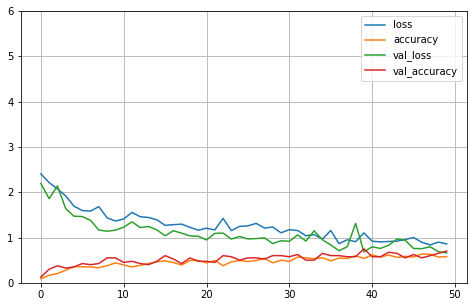

In [33]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,6)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


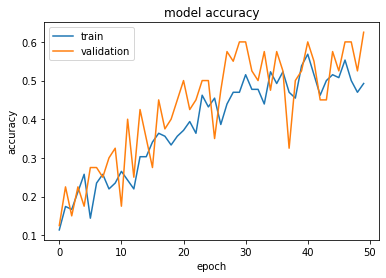

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upperleft')
plt.show()